In [15]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
import sys
import os
from scipy import interpolate
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.io import fits
from scipy.optimize import curve_fit
import astropy.units as u
import astropy.constants as c
from astropy.timeseries import LombScargle
import matplotlib.font_manager as font_manager
%matplotlib inline
font_prop = font_manager.FontProperties(size=16)

In [3]:
import stingray as sr
from stingray.events import EventList
from stingray.lightcurve import Lightcurve

In [2]:
from stingray import Lightcurve, Crossspectrum, sampledata,Powerspectrum,AveragedPowerspectrum
from stingray.simulator import simulator, models

/Users/baotong/opt/anaconda3/lib/python3.8/site-packages/stingray/crossspectrum.py:21: UserWarning: Using standard scipy fft
  warnings.warn("Using standard scipy fft")


In [9]:
path='/Users/baotong/Desktop/CDFS/'

In [10]:
file=fits.open(path+'081441.91+212918.5_lccorr_1000_hard.fits')

In [11]:
time=file[1].data['time'];rate=file[1].data['rate'];err=file[1].data['ERROR']

In [38]:
segment=10;out=[]

In [39]:
i=0
while i < len(time)-segment:
    xbar=np.mean(rate[i:i+segment])
    sigmai=err[i:i+segment]
    xi=rate[i:i+segment]
    N=segment
    sig_NXS2=1/xbar**2*(1/(N-1)*np.sum((xi-xbar)*(xi-xbar))-1/N*np.sum(sigmai**2))
    i+=1
    out.append(sig_NXS2)

In [40]:
print(np.mean(np.array(out)))

0.0006968589782864792


In [59]:
def get_LS(time, flux,freq):
    x = time
    y = flux
    # dy=np.sqrt(y)
    # plt.scatter(x,y)
    # plt.show()

    # LS = LombScargle(x, y, dy = 1, normalization = 'standard', fit_mean = True,
    #                  center_data = True).power(freq, method = 'cython')
    LS = LombScargle(x, y,normalization = 'psd')
    # LS = LombScargle(x, y, dy, normalization='psd')
    power = LS.power(freq)

    # print('freq_num={0}'.format(len(freq)))
    FP=LS.false_alarm_probability(power.max(),minimum_frequency = freq[0], maximum_frequency = freq[-1],method='naive')
    FP_99 = LS.false_alarm_level(0.01, minimum_frequency = freq[0], maximum_frequency = freq[-1],method='naive')
    FP_90 = LS.false_alarm_level(0.1,  minimum_frequency=freq[0],
                                 maximum_frequency=freq[-1], method='naive')
    FP_68 = LS.false_alarm_level(0.32, minimum_frequency=freq[0],
                                 maximum_frequency=freq[-1], method='naive')

    # if FP<0.01:print(dataname)
    plt.title('FP={0}'.format(FP))
    plt.semilogx()
    plt.plot(freq, power)
    print(1./freq[np.where(power==np.max(power))])
    plt.plot([freq[0], freq[-1]], [FP_99, FP_99], '--')
    plt.plot([freq[0], freq[-1]], [FP_90, FP_90], '--')
    plt.plot([freq[0], freq[-1]], [FP_68, FP_68], '--')
    plt.show()

    return [FP, 1. / freq[np.where(power == np.max(power))]]


In [44]:
path='/Users/baotong/Desktop/CDFS/'
file1='145108.76+270926.9_lccorr_1000_soft.fits'
file2='145108.76+270926.9_lccorr_1000_soft_2nd.fits'
time1=fits.open(path+file1)[1].data['TIME']
rate1=fits.open(path+file1)[1].data['RATE']
err1=fits.open(path+file1)[1].data['ERROR']
time2=fits.open(path+file2)[1].data['TIME']
rate2=fits.open(path+file2)[1].data['RATE']
err2=fits.open(path+file2)[1].data['ERROR']

In [46]:
time=np.concatenate((time1,time2))
rate=np.concatenate((rate1,rate2))
err=np.concatenate((err1,err2))

[90000.]


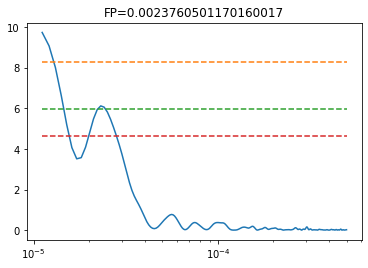

[0.0023760501170160017, array([90000.])]

In [95]:
freq=np.arange(1/90000.,1/2000.,1/1e6)
get_LS(time2,rate2,freq)

In [32]:
lc=Lightcurve(time,rate*1000,dt=1000)
lc1=Lightcurve(time1,rate1*1000,dt=1000)
lc2=Lightcurve(time2,rate2*1000,dt=1000)

/Users/baotong/opt/anaconda3/lib/python3.8/site-packages/stingray/utils.py:118: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)


In [33]:
print(lc2.counts)

[3313.2644 2872.4702 2965.7666 3411.0002 3600.9443 3150.4548 3187.955
 3103.976  2478.3022 2404.0603 2512.8682 2481.7854 2479.2537 2616.3716
 2604.5615 2278.174  1972.4325 1972.5249 1937.0721 2024.4071 2071.3862
 2025.8412 2347.2207 2504.1924 2369.7732 2374.3965 2880.4146 2606.5662
 2391.033  2393.4087 2425.3794 2784.5723 3031.6338 3497.1763 3303.5054
 2455.1648 2570.7642 2908.0955 3141.9707 3274.6963 3026.194  3170.3435
 3162.9272 2957.066  2509.2039 2212.8503 2055.6182 1873.2463 1782.086
 1446.6174 1459.2473 1315.165  1407.0579 1575.5945 1656.3164 1420.1432
 1397.8153 1313.4712 1265.5096 1329.003  1276.9061 1276.6786 1180.1051
 1161.5052 1073.0402 1129.6779 1272.5571 1346.5328 1393.6146 1552.7231
 1406.6969 1629.9257 1693.8164 1760.9065 1479.4222 1666.0844 1857.7052
 2009.9915 2063.2246 2024.1364 1888.13   1641.5114]


In [78]:
ps = Powerspectrum(lc2,dt=1000)
print(ps.freq)

[1.21951220e-05 2.43902439e-05 3.65853659e-05 4.87804878e-05
 6.09756098e-05 7.31707317e-05 8.53658537e-05 9.75609756e-05
 1.09756098e-04 1.21951220e-04 1.34146341e-04 1.46341463e-04
 1.58536585e-04 1.70731707e-04 1.82926829e-04 1.95121951e-04
 2.07317073e-04 2.19512195e-04 2.31707317e-04 2.43902439e-04
 2.56097561e-04 2.68292683e-04 2.80487805e-04 2.92682927e-04
 3.04878049e-04 3.17073171e-04 3.29268293e-04 3.41463415e-04
 3.53658537e-04 3.65853659e-04 3.78048780e-04 3.90243902e-04
 4.02439024e-04 4.14634146e-04 4.26829268e-04 4.39024390e-04
 4.51219512e-04 4.63414634e-04 4.75609756e-04 4.87804878e-04]


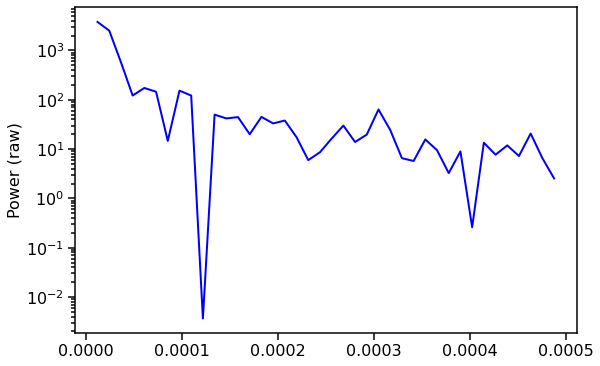

In [79]:
fig, ax1 = plt.subplots(1,1,figsize=(9,6), sharex=True)
ax1.plot(ps.freq, ps.power, lw=2, color='blue')
ax1.set_ylabel("Frequency (Hz)", fontproperties=font_prop)
ax1.set_ylabel("Power (raw)", fontproperties=font_prop)
ax1.set_yscale('log')
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.tick_params(which='major', width=1.5, length=7)
ax1.tick_params(which='minor', width=1.5, length=4)
for axis in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axis].set_linewidth(1.5)
plt.show()

In [56]:
def pfold(time,P,flux):
    def trans(t, p_test, shift=0.5):
        ti = t
        v = 1.0 / p_test
        turns = v * ti
        turns += shift
        # 初始相位
        for i in range(len(turns)):
            turns[i] = turns[i] - int(turns[i])
        return turns
    turns=trans(time,P)
    plt.figure(1,(8,6))
    plt.xlabel('phase')
    plt.ylabel('photon flux')
    #print(useobs[np.where((turns<0.5)&(turns>0.2))])
    plt.errorbar(turns,flux[0],yerr=[flux[0]-flux[1],flux[2]-flux[0]],
                 fmt = 'o', capsize = 3, elinewidth = 1, color='red',ecolor = 'red')
#     plt.errorbar(turns+1., flux[0], yerr = [flux[0] - flux[1], flux[2] - flux[0]],
#                  fmt = 'o', capsize = 3, elinewidth = 1, color = 'red', ecolor = 'red')
    #plt.savefig('/Volumes/pulsar/WR/1671/pfold_2_4.eps')
    plt.show()
#pfold(usetime,7.5188,[CR_IG,CR_low_IG,CR_high_IG])

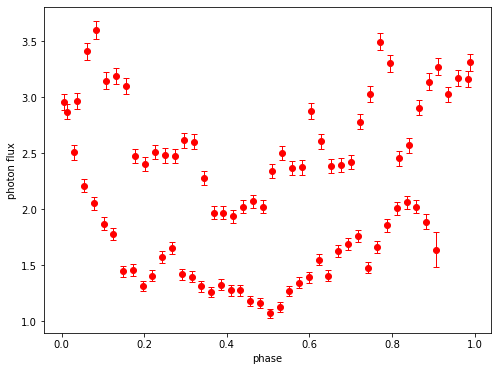

In [72]:
pfold(time2,42253.52112676,[rate2,rate2-err2,rate2+err2])